In [3]:
#Part 1
import pymc as pm
import numpy as np
import arviz as az

n, loc_true, scale_true, df_true = 100, 10, 2, 15

np.random.seed(42) 
x = np.random.standard_t(df=df_true, size=n) * scale_true + loc_true

with pm.Model() as model:
    loc = pm.Normal('loc', mu=0, sigma=10)
    scale = pm.HalfNormal('scale', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=100)

    likelihood = pm.StudentT('x', mu=loc, sigma=scale, nu=df, observed=x)

    trace = pm.sample(draws=3000, tune=1000, return_inferencedata=True)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 4 seconds.


Summary of Parameters:
         mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
loc     9.662   0.213   9.250   10.055      0.002    0.002    8865.0   
df     34.949  27.994   3.000   89.000      0.873    0.618     889.0   
scale   2.038   0.212   1.633    2.440      0.005    0.004    1678.0   

       ess_tail  r_hat  
loc      7706.0   1.00  
df       1076.0   1.01  
scale    2085.0   1.00  

Effective Sample Sizes:
<xarray.Dataset>
Dimensions:  ()
Data variables:
    loc      float64 8.865e+03
    df       float64 888.5
    scale    float64 1.678e+03

R-hat for Convergence:
<xarray.Dataset>
Dimensions:  ()
Data variables:
    loc      float64 1.0
    df       float64 1.006
    scale    float64 1.003

Divergences: 0


array([[<Axes: title={'center': 'loc'}>, <Axes: title={'center': 'loc'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

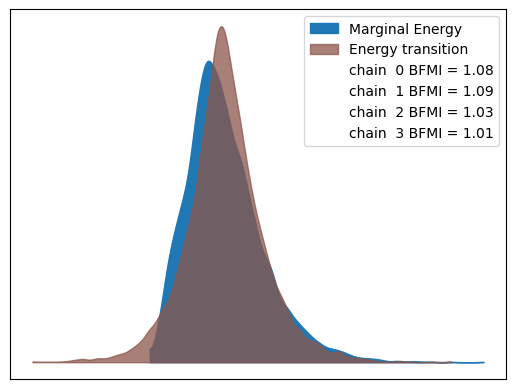

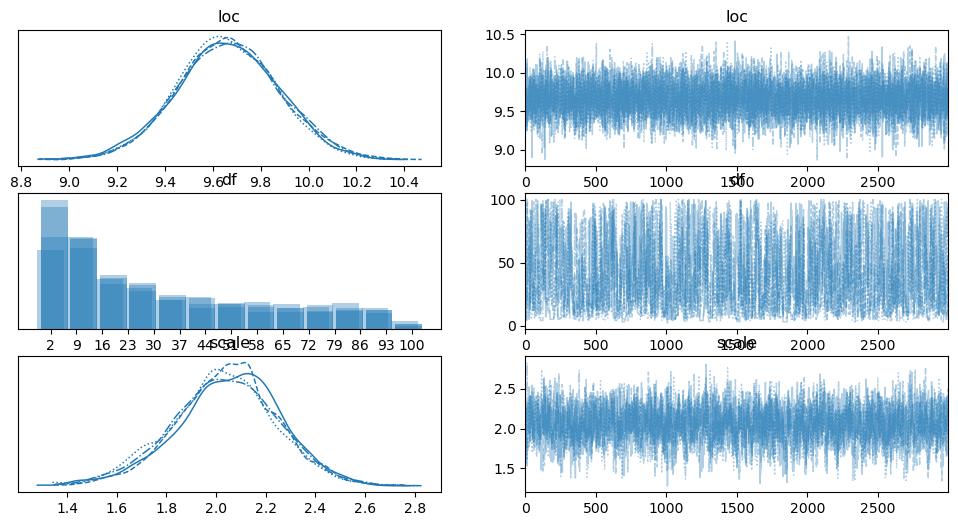

In [5]:
#Part 2
import arviz as az

summary = az.summary(trace)
print("Summary of Parameters:")
print(summary)

ess = az.ess(trace)
print("\nEffective Sample Sizes:")
print(ess)

rhat = az.rhat(trace)
print("\nR-hat for Convergence:")
print(rhat)

divergences = trace.sample_stats.diverging.sum().item()
print(f"\nDivergences: {divergences}")

az.plot_energy(trace)

az.plot_trace(trace)
